<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Linear regression: Training and Validation Data</h1> 


<h2>Table of Contents</h2>
<p>Aim: Selecting the best learning rate by using validation data.</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#LR_Loader_Cost">Create a Linear Regression Object, Data Loader and Criterion Function</a></li>
    <li><a href="#LR_Hyper">Different learning rates and Data Structures to Store results for Different Hyperparameters</a></li>
    <li><a href="#Model">Train different modules for different Hyperparameters</a></li>
    <li><a href="#Result">View Results</a></li>
</ul>

<hr>

<h2>Preparation</h2>


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)

<h2 id="Makeup_Data">Make Some Data</h2>


First, we'll create some artificial data in a dataset class. The class will include the option to produce training data or validation data. The training data will include outliers.


In [4]:
# Create Data class

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            # outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [5]:
# Create training dataset and validation dataset

train_data = Data()
val_data = Data(train = False)

Overlay the training points in red over the function that generated the data. Notice the outliers at x=-3 and around x=2:


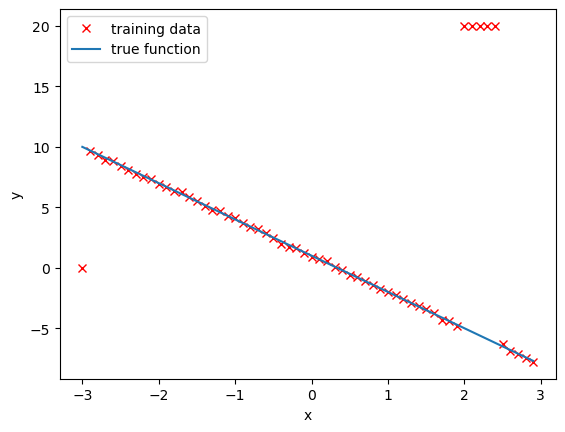

In [6]:
# Plot out training points

plt.plot(train_data.x.numpy(),
         train_data.y.numpy(), 'xr', label = 'training data')
plt.plot(train_data.x.numpy(),
         train_data.f.numpy(), label = 'true function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


<h2 id="LR_Loader_Cost">Create a Linear Regression Object,  Data Loader, and Criterion Function</h2>


In [7]:
# Create Linear Regression(LR) Class

class LR(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [8]:
# Create MSELoss function and DataLoader

criterion = nn.MSELoss()
loader_train = DataLoader(dataset = train_data, batch_size = 1)

### Different Learning Rates and Data Structures to Store Results

In [9]:
# Create Learning Rate list, the error lists and the MODELS list

learning_rates = [0.0001, 0.001, 0.01, 0.1]

train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))

MODELS = []

### Train Different Models for Different Hyperparameters

Try different values of learning rates, perform stochastic gradient descent, and save the results on the training data and validation data. Finally, save each model in a list.


In [11]:
# Define the train model function and train the model

def train_model_with_lr (iter, lr_list):
    
    # iterate through different learning rates
    for i, lr in enumerate(lr_list):
        model = LR(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in loader_train:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
    
        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

<h2 id="Result">View the Results</h2>


Plot the training loss and validation loss for each learning rate:  


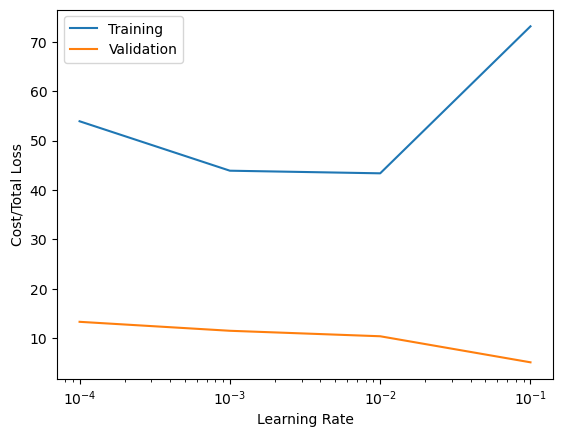

In [13]:
plt.semilogx(np.array(learning_rates),
             train_error.numpy(), label = 'Training')
plt.semilogx(np.array(learning_rates),
             validation_error.numpy(), label = 'Validation')
plt.ylabel('Cost/Total Loss')
plt.xlabel('Learning Rate')
plt.legend()
plt.show()

Produce a prediction by using the validation data for each model:  


0 [[2.9080176]
 [2.803559 ]
 [2.6991003]]
1 [[5.5941   ]
 [5.479583 ]
 [5.3650656]]
2 [[6.596816 ]
 [6.462076 ]
 [6.3273363]]
3 [[14.248131]
 [13.820433]
 [13.392734]]


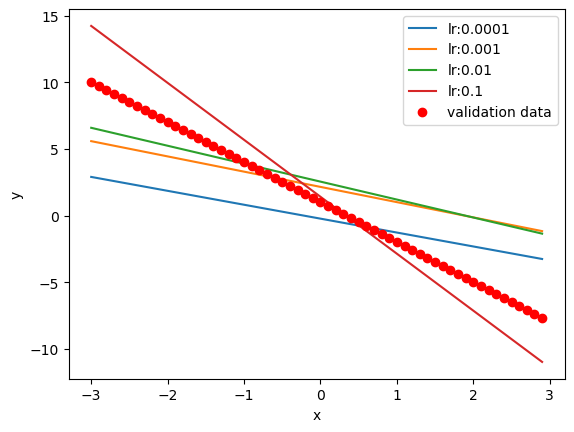

In [14]:
# Plot the predictions

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), 
             label = 'lr:' + str(learning_rate))
    print(i, yhat.detach().numpy()[0:3])
    i+=1
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 
         'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h3>Practice</h3>


The object <code>good_model</code> is the best performing model. Use the train loader to get the data samples x and y. Produce an estimate for <code>yhat</code> and print it out for every sample in a for a loop. Compare it to the actual prediction <code>y</code>.


In [16]:
good_model = MODELS[np.argmin(validation_error)]

for x, y in loader_train:
    print('yhat =', model(x), 'y', y)

yhat = tensor([[14.2481]], grad_fn=<AddmmBackward0>) y tensor([[0.]])
yhat = tensor([[13.8204]], grad_fn=<AddmmBackward0>) y tensor([[9.6250]])
yhat = tensor([[13.3927]], grad_fn=<AddmmBackward0>) y tensor([[9.3346]])
yhat = tensor([[12.9650]], grad_fn=<AddmmBackward0>) y tensor([[8.9391]])
yhat = tensor([[12.5373]], grad_fn=<AddmmBackward0>) y tensor([[8.7900]])
yhat = tensor([[12.1096]], grad_fn=<AddmmBackward0>) y tensor([[8.4391]])
yhat = tensor([[11.6819]], grad_fn=<AddmmBackward0>) y tensor([[8.1020]])
yhat = tensor([[11.2542]], grad_fn=<AddmmBackward0>) y tensor([[7.7391]])
yhat = tensor([[10.8265]], grad_fn=<AddmmBackward0>) y tensor([[7.5288]])
yhat = tensor([[10.3988]], grad_fn=<AddmmBackward0>) y tensor([[7.3304]])
yhat = tensor([[9.9711]], grad_fn=<AddmmBackward0>) y tensor([[6.9223]])
yhat = tensor([[9.5434]], grad_fn=<AddmmBackward0>) y tensor([[6.6749]])
yhat = tensor([[9.1157]], grad_fn=<AddmmBackward0>) y tensor([[6.3778]])
yhat = tensor([[8.6880]], grad_fn=<AddmmBackw